In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sS = pd.read_csv("sampleSubmission.csv")

In [3]:
select_label = [0, 1, 2, 3]
select_habits = [0., 1.]

In [4]:
train['推薦類型'].replace(['肌力',"柔軟度","心肺","肌耐力"],[0,1,2,3] , inplace = True)

In [5]:
train = train[train['推薦類型'].isin(select_label)]

In [6]:
train = train[train['拳擊'].isin(select_habits)]
train = train[train['器材'].isin(select_habits)]
train = train[train['有氧'].isin(select_habits)]
train = train[train['舞蹈'].isin(select_habits)]
train = train[train['高強度間歇'].isin(select_habits)]
train = train[train['瑜伽'].isin(select_habits)]
train = train[train['肌力訓練'].isin(select_habits)]
train = train[train['燃脂'].isin(select_habits)]
train = train[train['減脂瘦身'].isin(select_habits)]
train = train[train['增加肌肉'].isin(select_habits)]
train = train[train['增強體魄'].isin(select_habits)]
train = train[train['舒緩壓力'].isin(select_habits)]

In [7]:
train = train[train['年齡']<70]

In [8]:
train = train[train['BMI']>10]

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 5 to 26416
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   性別      3425 non-null   float64
 1   年齡      3425 non-null   float64
 2   BMI     3425 non-null   float64
 3   拳擊      3425 non-null   float64
 4   器材      3425 non-null   float64
 5   有氧      3425 non-null   float64
 6   舞蹈      3425 non-null   float64
 7   高強度間歇   3425 non-null   float64
 8   瑜伽      3425 non-null   float64
 9   肌力訓練    3425 non-null   float64
 10  燃脂      3425 non-null   float64
 11  減脂瘦身    3425 non-null   float64
 12  增加肌肉    3425 non-null   float64
 13  增強體魄    3425 non-null   float64
 14  舒緩壓力    3425 non-null   float64
 15  推薦類型    3425 non-null   object 
dtypes: float64(15), object(1)
memory usage: 454.9+ KB


In [10]:
train['推薦類型'] = train['推薦類型'].astype("int64")

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 5 to 26416
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   性別      3425 non-null   float64
 1   年齡      3425 non-null   float64
 2   BMI     3425 non-null   float64
 3   拳擊      3425 non-null   float64
 4   器材      3425 non-null   float64
 5   有氧      3425 non-null   float64
 6   舞蹈      3425 non-null   float64
 7   高強度間歇   3425 non-null   float64
 8   瑜伽      3425 non-null   float64
 9   肌力訓練    3425 non-null   float64
 10  燃脂      3425 non-null   float64
 11  減脂瘦身    3425 non-null   float64
 12  增加肌肉    3425 non-null   float64
 13  增強體魄    3425 non-null   float64
 14  舒緩壓力    3425 non-null   float64
 15  推薦類型    3425 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 454.9 KB


In [12]:
X = train.drop(["推薦類型"], axis =1)
y = train["推薦類型"]

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV

0    744
1    744
2    744
3    744
Name: 推薦類型, dtype: int64

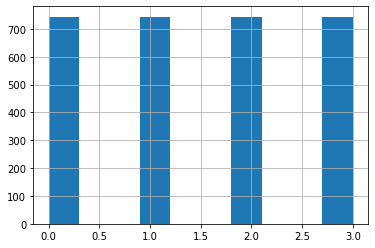

In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
#X_s, y_s =  EditedNearestNeighbours().fit_resample(X, y)
X_s, y_s =  TomekLinks().fit_resample(X, y)
X_s, y_s = SMOTE(random_state = 0).fit_resample(X_s,y_s)


y_s.hist()
y_s.value_counts()

In [15]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, y_train, y_val = train_test_split(
   X_s, y_s, test_size=0.33, random_state=42)

In [16]:
randomForestModel = RandomForestClassifier(random_state = 42, n_estimators= 400)
#scores = cross_val_score(randomForestModel,X_s,y_s,cv = 7,scoring = 'accuracy')
#scores.mean()

In [17]:
randomForestModel.fit(X_train,y_train)
randomForestModel.score(X_val,y_val)

0.9684638860630722

In [18]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC


def accuracy_score(y_val,y_pred):
    Sum = 0
    y_val = y_val.tolist()
    y_pred = y_pred.tolist()
    for i in range(len(y_pred)):
        if y_val[i] == y_pred[i]:
            Sum+=1
    score = Sum/len(y_pred)
    
    return score


rnd_clf = RandomForestClassifier(random_state=42,n_estimators=400)
xgb_clf =  XGBClassifier(random_state=42, n_estimators=400, max_depth = 12,learning_rate =0.15)

voting_clf = VotingClassifier(estimators=[('xg', xgb_clf), ('rf', rnd_clf)],voting='hard')
scores_1 = cross_val_score(rnd_clf,X_s,y_s,cv = 3,scoring = 'accuracy')
scores_2 = cross_val_score(xgb_clf,X_s,y_s,cv = 3,scoring = 'accuracy')
scores = cross_val_score(voting_clf,X_s,y_s,cv = 3,scoring = 'accuracy')
print("rnd: "+str(scores_1.mean()))
print(" xgb: "+str(scores_2.mean()))
print(" vote: "+str(scores.mean()))

C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
rnd: 0.9623655913978495
 xgb: 0.9596774193548386
 vote: 0.9630376344086021


In [19]:
randomForestModel.fit(X_s,y_s)
y_pred = randomForestModel.predict(test)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)

In [20]:
train = pd.concat([X_s,y_s], axis =1, join = 'outer')
train = train[train['拳擊'].isin(select_habits)]
train = train[train['器材'].isin(select_habits)]
train = train[train['有氧'].isin(select_habits)]
train = train[train['舞蹈'].isin(select_habits)]
train = train[train['高強度間歇'].isin(select_habits)]
train = train[train['瑜伽'].isin(select_habits)]
train = train[train['肌力訓練'].isin(select_habits)]
train = train[train['燃脂'].isin(select_habits)]
train = train[train['減脂瘦身'].isin(select_habits)]
train = train[train['增加肌肉'].isin(select_habits)]
train = train[train['增強體魄'].isin(select_habits)]
train = train[train['舒緩壓力'].isin(select_habits)]

In [21]:
train

,性別,年齡,BMI,拳擊,器材,有氧,舞蹈,高強度間歇,瑜伽,肌力訓練,燃脂,減脂瘦身,增加肌肉,增強體魄,舒緩壓力,推薦類型
0,1.0,47.000000,22.521372,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0
1,1.0,46.000000,23.161083,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0
2,1.0,48.000000,23.223720,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,1.0,46.000000,23.626036,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0
4,1.0,47.000000,22.491349,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,0.0,24.000000,16.777174,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3
2965,0.0,27.000000,15.122466,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,3
2967,0.0,29.000000,15.413830,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3
2970,1.0,22.613553,23.841476,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3


<AxesSubplot:>

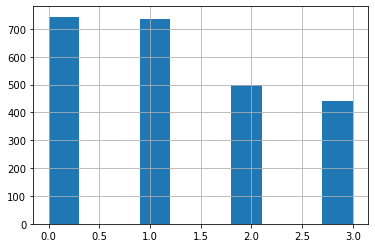

In [22]:
train["推薦類型"].hist()

In [23]:
y_s= train["推薦類型"]
X_s = train.drop(["推薦類型"],axis = 1)

In [24]:
X_s, y_s = TomekLinks().fit_resample(X_s, y_s)
X_s, y_s = SMOTE(random_state = 0).fit_resample(X_s,y_s)

In [25]:
X_train, X_val, y_train, y_val = train_test_split(
   X_s, y_s, test_size=0.33, random_state=42)

In [38]:
randomForestModel = RandomForestClassifier(random_state = 42, n_estimators= 500)
randomForestModel.fit(X_train,y_train)
randomForestModel.score(X_val,y_val)

0.8991769547325102

In [39]:
randomForestModel.fit(X_s,y_s)
y_pred = randomForestModel.predict(test)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)